## Set environment

In [ ]:
#Mount google drive when on google colab

from google.colab import drive
drive.mount('/content/drive')

#Set working directory on google colab
%cd /content/drive/MyDrive/shape-recognition/

In [ ]:
# Install packages
%pip install -r requirements.txt

import matplotlib.pyplot as plt
import pandas as pd

## Training

In [5]:
!wandb disabled
%run train.py --name data-2 --epochs 10 --batch 2 --lr 0.001 --model fasterrcnn_resnet50_fpn_v2 --data configs/data-2.yaml --imgsz 1024 --no-mosaic --workers 2 --device cuda

W&B disabled.
Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1000
Number of validation samples: 100

Building model from scratch...
43,266,403 total parameters.
43,041,059 training parameters.


[INFO/Process-3] child process calling self.run()
[INFO/Process-4] child process calling self.run()
[INFO/MainProcess] Epoch: [0]  [  0/500]  eta: 0:09:41  lr: 0.000003  loss: 4.9499 (4.9499)  loss_classifier: 1.4929 (1.4929)  loss_box_reg: 0.5324 (0.5324)  loss_objectness: 2.8397 (2.8397)  loss_rpn_box_reg: 0.0849 (0.0849)  time: 1.1622  data: 0.5239  max mem: 5146
[INFO/MainProcess] Epoch: [0]  [100/500]  eta: 0:03:52  lr: 0.000203  loss: 1.5645 (2.6150)  loss_classifier: 0.6764 (0.9718)  loss_box_reg: 0.6739 (0.6513)  loss_objectness: 0.1412 (0.9198)  loss_rpn_box_reg: 0.0578 (0.0721)  time: 0.5968  data: 0.0111  max mem: 5401
[INFO/MainProcess] Epoch: [0]  [200/500]  eta: 0:02:59  lr: 0.000403  loss: 1.1500 (1.9678)  loss_classifier: 0.4599 (0.7577)  loss_box_reg: 0.5554 (0.6301)  loss_objectness: 0.0931 (0.5180)  loss_rpn_box_reg: 0.0469 (0.0620)  time: 0.6167  data: 0.0128  max mem: 5402
[INFO/MainProcess] Epoch: [0]  [300/500]  eta: 0:02:00  lr: 0.000604  loss: 0.7691 (1.6174)  

creating index...
index created!


[INFO/Process-5] child process calling self.run()
[INFO/Process-6] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:43  model_time: 0.3192 (0.3192)  evaluator_time: 0.0769 (0.0769)  time: 0.8622  data: 0.3055  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2525 (0.2556)  evaluator_time: 0.0813 (0.1196)  time: 0.3494  data: 0.0078  max mem: 5402
[INFO/Process-6] process shutting down
[INFO/Process-5] process shutting down
[INFO/Process-6] process exiting with exitcode 0
[INFO/Process-5] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:20 (0.4035 s / it)


Averaged stats: model_time: 0.2525 (0.2556)  evaluator_time: 0.0813 (0.1196)
Accumulating evaluation results...
DONE (t=0.18s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.715
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.889
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.817
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.716
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.786
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.499
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.786
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-7] child process calling self.run()
[INFO/Process-8] child process calling self.run()
[INFO/MainProcess] Epoch: [1]  [  0/500]  eta: 0:08:12  lr: 0.001000  loss: 0.4318 (0.4318)  loss_classifier: 0.1688 (0.1688)  loss_box_reg: 0.2086 (0.2086)  loss_objectness: 0.0285 (0.0285)  loss_rpn_box_reg: 0.0259 (0.0259)  time: 0.9859  data: 0.3208  max mem: 5402
[INFO/MainProcess] Epoch: [1]  [100/500]  eta: 0:04:13  lr: 0.001000  loss: 0.4066 (0.4393)  loss_classifier: 0.1653 (0.1802)  loss_box_reg: 0.2082 (0.2168)  loss_objectness: 0.0139 (0.0186)  loss_rpn_box_reg: 0.0221 (0.0237)  time: 0.6223  data: 0.0153  max mem: 5402
[INFO/MainProcess] Epoch: [1]  [200/500]  eta: 0:03:07  lr: 0.001000  loss: 0.3640 (0.4080)  loss_classifier: 0.1518 (0.1672)  loss_box_reg: 0.1803 (0.2016)  loss_objectness: 0.0138 (0.0167)  loss_rpn_box_reg: 0.0214 (0.0225)  time: 0.6110  data: 0.0117  max mem: 5402
[INFO/MainProcess] Epoch: [1]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.3415 (0.3863)  

creating index...
index created!


[INFO/Process-9] child process calling self.run()
[INFO/Process-10] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:41  model_time: 0.3022 (0.3022)  evaluator_time: 0.0661 (0.0661)  time: 0.8284  data: 0.3316  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2514 (0.2559)  evaluator_time: 0.0662 (0.0900)  time: 0.3356  data: 0.0085  max mem: 5402
[INFO/Process-9] process shutting down
[INFO/Process-10] process shutting down
[INFO/Process-10] process exiting with exitcode 0
[INFO/Process-9] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.3758 s / it)


Averaged stats: model_time: 0.2514 (0.2559)  evaluator_time: 0.0662 (0.0900)
Accumulating evaluation results...
DONE (t=0.10s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.838
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.961
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.924
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.838
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.875
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.057
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.555
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.873
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-11] child process calling self.run()
[INFO/Process-12] child process calling self.run()
[INFO/MainProcess] Epoch: [2]  [  0/500]  eta: 0:08:02  lr: 0.001000  loss: 0.2732 (0.2732)  loss_classifier: 0.1107 (0.1107)  loss_box_reg: 0.1424 (0.1424)  loss_objectness: 0.0054 (0.0054)  loss_rpn_box_reg: 0.0146 (0.0146)  time: 0.9652  data: 0.3164  max mem: 5402
[INFO/MainProcess] Epoch: [2]  [100/500]  eta: 0:04:11  lr: 0.001000  loss: 0.2526 (0.2557)  loss_classifier: 0.0924 (0.1004)  loss_box_reg: 0.1361 (0.1318)  loss_objectness: 0.0053 (0.0073)  loss_rpn_box_reg: 0.0149 (0.0162)  time: 0.6161  data: 0.0114  max mem: 5402
[INFO/MainProcess] Epoch: [2]  [200/500]  eta: 0:03:06  lr: 0.001000  loss: 0.2400 (0.2503)  loss_classifier: 0.0952 (0.0981)  loss_box_reg: 0.1221 (0.1291)  loss_objectness: 0.0050 (0.0070)  loss_rpn_box_reg: 0.0158 (0.0162)  time: 0.6144  data: 0.0104  max mem: 5402
[INFO/MainProcess] Epoch: [2]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.2434 (0.2469)

creating index...
index created!


[INFO/Process-13] child process calling self.run()
[INFO/Process-14] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:39  model_time: 0.2939 (0.2939)  evaluator_time: 0.0749 (0.0749)  time: 0.7834  data: 0.3057  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2512 (0.2556)  evaluator_time: 0.0626 (0.0836)  time: 0.3373  data: 0.0085  max mem: 5402
[INFO/Process-14] process shutting down
[INFO/Process-13] process shutting down
[INFO/Process-13] process exiting with exitcode 0
[INFO/Process-14] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.3712 s / it)


Averaged stats: model_time: 0.2512 (0.2556)  evaluator_time: 0.0626 (0.0836)
Accumulating evaluation results...
DONE (t=0.16s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.875
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.969
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.946
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.875
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.905
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.058
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.569
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-15] child process calling self.run()
[INFO/Process-16] child process calling self.run()
[INFO/MainProcess] Epoch: [3]  [  0/500]  eta: 0:12:32  lr: 0.001000  loss: 0.2140 (0.2140)  loss_classifier: 0.0760 (0.0760)  loss_box_reg: 0.1185 (0.1185)  loss_objectness: 0.0055 (0.0055)  loss_rpn_box_reg: 0.0140 (0.0140)  time: 1.5059  data: 0.8350  max mem: 5402
[INFO/MainProcess] Epoch: [3]  [100/500]  eta: 0:04:13  lr: 0.001000  loss: 0.1917 (0.2004)  loss_classifier: 0.0677 (0.0755)  loss_box_reg: 0.1067 (0.1060)  loss_objectness: 0.0027 (0.0052)  loss_rpn_box_reg: 0.0126 (0.0137)  time: 0.6157  data: 0.0127  max mem: 5402
[INFO/MainProcess] Epoch: [3]  [200/500]  eta: 0:03:07  lr: 0.001000  loss: 0.2018 (0.2001)  loss_classifier: 0.0794 (0.0754)  loss_box_reg: 0.1056 (0.1062)  loss_objectness: 0.0030 (0.0049)  loss_rpn_box_reg: 0.0129 (0.0136)  time: 0.6112  data: 0.0130  max mem: 5402
[INFO/MainProcess] Epoch: [3]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.1818 (0.1979)

creating index...
index created!


[INFO/Process-17] child process calling self.run()
[INFO/Process-18] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:41  model_time: 0.3305 (0.3305)  evaluator_time: 0.0714 (0.0714)  time: 0.8377  data: 0.3023  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2513 (0.2563)  evaluator_time: 0.0564 (0.0868)  time: 0.3448  data: 0.0089  max mem: 5402
[INFO/Process-17] process shutting down
[INFO/Process-17] process exiting with exitcode 0
[INFO/Process-18] process shutting down
[INFO/Process-18] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.3714 s / it)


Averaged stats: model_time: 0.2513 (0.2563)  evaluator_time: 0.0564 (0.0868)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.885
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.971
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.885
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.922
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.058
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.573
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.908
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-19] child process calling self.run()
[INFO/Process-20] child process calling self.run()
[INFO/MainProcess] Epoch: [4]  [  0/500]  eta: 0:10:19  lr: 0.001000  loss: 0.2603 (0.2603)  loss_classifier: 0.1139 (0.1139)  loss_box_reg: 0.1275 (0.1275)  loss_objectness: 0.0009 (0.0009)  loss_rpn_box_reg: 0.0180 (0.0180)  time: 1.2392  data: 0.5292  max mem: 5402
[INFO/MainProcess] Epoch: [4]  [100/500]  eta: 0:04:12  lr: 0.001000  loss: 0.1588 (0.1716)  loss_classifier: 0.0580 (0.0611)  loss_box_reg: 0.0887 (0.0946)  loss_objectness: 0.0022 (0.0038)  loss_rpn_box_reg: 0.0111 (0.0121)  time: 0.6082  data: 0.0122  max mem: 5402
[INFO/MainProcess] Epoch: [4]  [200/500]  eta: 0:03:07  lr: 0.001000  loss: 0.1556 (0.1685)  loss_classifier: 0.0556 (0.0597)  loss_box_reg: 0.0895 (0.0932)  loss_objectness: 0.0015 (0.0035)  loss_rpn_box_reg: 0.0114 (0.0120)  time: 0.6159  data: 0.0124  max mem: 5402
[INFO/MainProcess] Epoch: [4]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.1650 (0.1673)

creating index...
index created!


[INFO/Process-21] child process calling self.run()
[INFO/Process-22] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:43  model_time: 0.3124 (0.3124)  evaluator_time: 0.0891 (0.0891)  time: 0.8783  data: 0.3592  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2507 (0.2552)  evaluator_time: 0.0572 (0.0811)  time: 0.3269  data: 0.0095  max mem: 5402
[INFO/Process-21] process shutting down
[INFO/Process-22] process shutting down
[INFO/Process-22] process exiting with exitcode 0
[INFO/Process-21] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.3673 s / it)


Averaged stats: model_time: 0.2507 (0.2552)  evaluator_time: 0.0572 (0.0811)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.973
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.955
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.922
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.576
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.915
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-23] child process calling self.run()
[INFO/Process-24] child process calling self.run()
[INFO/MainProcess] Epoch: [5]  [  0/500]  eta: 0:10:55  lr: 0.001000  loss: 0.1416 (0.1416)  loss_classifier: 0.0510 (0.0510)  loss_box_reg: 0.0785 (0.0785)  loss_objectness: 0.0028 (0.0028)  loss_rpn_box_reg: 0.0093 (0.0093)  time: 1.3117  data: 0.5642  max mem: 5402
[INFO/MainProcess] Epoch: [5]  [100/500]  eta: 0:04:13  lr: 0.001000  loss: 0.1489 (0.1491)  loss_classifier: 0.0496 (0.0520)  loss_box_reg: 0.0801 (0.0839)  loss_objectness: 0.0018 (0.0024)  loss_rpn_box_reg: 0.0106 (0.0108)  time: 0.6059  data: 0.0118  max mem: 5402
[INFO/MainProcess] Epoch: [5]  [200/500]  eta: 0:03:07  lr: 0.001000  loss: 0.1424 (0.1477)  loss_classifier: 0.0528 (0.0515)  loss_box_reg: 0.0800 (0.0825)  loss_objectness: 0.0015 (0.0027)  loss_rpn_box_reg: 0.0108 (0.0109)  time: 0.6194  data: 0.0134  max mem: 5402
[INFO/MainProcess] Epoch: [5]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.1457 (0.1476)

creating index...
index created!


[INFO/Process-25] child process calling self.run()
[INFO/Process-26] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:42  model_time: 0.3326 (0.3326)  evaluator_time: 0.0559 (0.0559)  time: 0.8528  data: 0.3455  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2526 (0.2572)  evaluator_time: 0.0609 (0.0777)  time: 0.3498  data: 0.0093  max mem: 5402
[INFO/Process-25] process shutting down
[INFO/Process-26] process shutting down
[INFO/Process-25] process exiting with exitcode 0
[INFO/Process-26] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.3647 s / it)


Averaged stats: model_time: 0.2526 (0.2572)  evaluator_time: 0.0609 (0.0777)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.973
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.959
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.931
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.579
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.920
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-27] child process calling self.run()
[INFO/Process-28] child process calling self.run()
[INFO/MainProcess] Epoch: [6]  [  0/500]  eta: 0:08:27  lr: 0.001000  loss: 0.1054 (0.1054)  loss_classifier: 0.0346 (0.0346)  loss_box_reg: 0.0623 (0.0623)  loss_objectness: 0.0010 (0.0010)  loss_rpn_box_reg: 0.0076 (0.0076)  time: 1.0147  data: 0.3521  max mem: 5402
[INFO/MainProcess] Epoch: [6]  [100/500]  eta: 0:04:13  lr: 0.001000  loss: 0.1187 (0.1290)  loss_classifier: 0.0412 (0.0429)  loss_box_reg: 0.0708 (0.0740)  loss_objectness: 0.0016 (0.0017)  loss_rpn_box_reg: 0.0104 (0.0104)  time: 0.6179  data: 0.0148  max mem: 5402
[INFO/MainProcess] Epoch: [6]  [200/500]  eta: 0:03:07  lr: 0.001000  loss: 0.1287 (0.1283)  loss_classifier: 0.0404 (0.0427)  loss_box_reg: 0.0762 (0.0736)  loss_objectness: 0.0008 (0.0018)  loss_rpn_box_reg: 0.0102 (0.0102)  time: 0.6222  data: 0.0135  max mem: 5402
[INFO/MainProcess] Epoch: [6]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.1256 (0.1275)

creating index...
index created!


[INFO/Process-29] child process calling self.run()
[INFO/Process-30] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:46  model_time: 0.3721 (0.3721)  evaluator_time: 0.0925 (0.0925)  time: 0.9232  data: 0.3073  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2545 (0.2570)  evaluator_time: 0.0745 (0.0762)  time: 0.3679  data: 0.0093  max mem: 5402
[INFO/Process-30] process shutting down
[INFO/Process-30] process exiting with exitcode 0
[INFO/Process-29] process shutting down
[INFO/Process-29] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.3638 s / it)


Averaged stats: model_time: 0.2545 (0.2570)  evaluator_time: 0.0745 (0.0762)
Accumulating evaluation results...
DONE (t=0.09s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.903
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.973
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.960
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.903
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.933
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.579
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.922
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-31] child process calling self.run()
[INFO/Process-32] child process calling self.run()
[INFO/MainProcess] Epoch: [7]  [  0/500]  eta: 0:11:11  lr: 0.001000  loss: 0.1314 (0.1314)  loss_classifier: 0.0288 (0.0288)  loss_box_reg: 0.0911 (0.0911)  loss_objectness: 0.0011 (0.0011)  loss_rpn_box_reg: 0.0104 (0.0104)  time: 1.3430  data: 0.5575  max mem: 5402
[INFO/MainProcess] Epoch: [7]  [100/500]  eta: 0:04:14  lr: 0.001000  loss: 0.1158 (0.1180)  loss_classifier: 0.0379 (0.0372)  loss_box_reg: 0.0678 (0.0697)  loss_objectness: 0.0007 (0.0013)  loss_rpn_box_reg: 0.0098 (0.0097)  time: 0.6100  data: 0.0125  max mem: 5402
[INFO/MainProcess] Epoch: [7]  [200/500]  eta: 0:03:08  lr: 0.001000  loss: 0.1102 (0.1194)  loss_classifier: 0.0340 (0.0375)  loss_box_reg: 0.0660 (0.0706)  loss_objectness: 0.0012 (0.0016)  loss_rpn_box_reg: 0.0091 (0.0096)  time: 0.6298  data: 0.0155  max mem: 5402
[INFO/MainProcess] Epoch: [7]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.1178 (0.1196)

creating index...
index created!


[INFO/Process-33] child process calling self.run()
[INFO/Process-34] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:41  model_time: 0.3235 (0.3235)  evaluator_time: 0.0589 (0.0589)  time: 0.8377  data: 0.3294  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2625 (0.2567)  evaluator_time: 0.1056 (0.0741)  time: 0.3848  data: 0.0142  max mem: 5402
[INFO/Process-33] process shutting down
[INFO/Process-34] process shutting down
[INFO/Process-34] process exiting with exitcode 0
[INFO/Process-33] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.3626 s / it)


Averaged stats: model_time: 0.2625 (0.2567)  evaluator_time: 0.1056 (0.0741)
Accumulating evaluation results...
DONE (t=0.10s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.901
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.971
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.960
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.901
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.931
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.579
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.922
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-35] child process calling self.run()
[INFO/Process-36] child process calling self.run()
[INFO/MainProcess] Epoch: [8]  [  0/500]  eta: 0:08:20  lr: 0.001000  loss: 0.1139 (0.1139)  loss_classifier: 0.0400 (0.0400)  loss_box_reg: 0.0622 (0.0622)  loss_objectness: 0.0007 (0.0007)  loss_rpn_box_reg: 0.0110 (0.0110)  time: 1.0015  data: 0.3367  max mem: 5402
[INFO/MainProcess] Epoch: [8]  [100/500]  eta: 0:04:12  lr: 0.001000  loss: 0.1079 (0.1122)  loss_classifier: 0.0320 (0.0342)  loss_box_reg: 0.0644 (0.0675)  loss_objectness: 0.0004 (0.0015)  loss_rpn_box_reg: 0.0085 (0.0090)  time: 0.6245  data: 0.0161  max mem: 5402
[INFO/MainProcess] Epoch: [8]  [200/500]  eta: 0:03:07  lr: 0.001000  loss: 0.1005 (0.1106)  loss_classifier: 0.0337 (0.0341)  loss_box_reg: 0.0609 (0.0661)  loss_objectness: 0.0004 (0.0014)  loss_rpn_box_reg: 0.0083 (0.0090)  time: 0.6213  data: 0.0123  max mem: 5402
[INFO/MainProcess] Epoch: [8]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.1097 (0.1097)

creating index...
index created!


[INFO/Process-37] child process calling self.run()
[INFO/Process-38] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:01:06  model_time: 0.3516 (0.3516)  evaluator_time: 0.2113 (0.2113)  time: 1.3378  data: 0.5920  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2526 (0.2562)  evaluator_time: 0.0543 (0.0794)  time: 0.3432  data: 0.0101  max mem: 5402
[INFO/Process-37] process shutting down
[INFO/Process-38] process shutting down
[INFO/Process-37] process exiting with exitcode 0
[INFO/Process-38] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.3744 s / it)


Averaged stats: model_time: 0.2526 (0.2562)  evaluator_time: 0.0543 (0.0794)
Accumulating evaluation results...
DONE (t=0.16s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.906
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.974
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.961
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.906
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.935
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.580
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.926
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-39] child process calling self.run()
[INFO/Process-40] child process calling self.run()
[INFO/MainProcess] Epoch: [9]  [  0/500]  eta: 0:08:30  lr: 0.001000  loss: 0.0684 (0.0684)  loss_classifier: 0.0170 (0.0170)  loss_box_reg: 0.0439 (0.0439)  loss_objectness: 0.0003 (0.0003)  loss_rpn_box_reg: 0.0072 (0.0072)  time: 1.0213  data: 0.3615  max mem: 5402
[INFO/MainProcess] Epoch: [9]  [100/500]  eta: 0:04:12  lr: 0.001000  loss: 0.1073 (0.1032)  loss_classifier: 0.0285 (0.0313)  loss_box_reg: 0.0593 (0.0618)  loss_objectness: 0.0007 (0.0013)  loss_rpn_box_reg: 0.0088 (0.0087)  time: 0.6168  data: 0.0141  max mem: 5402
[INFO/MainProcess] Epoch: [9]  [200/500]  eta: 0:03:07  lr: 0.001000  loss: 0.1022 (0.1044)  loss_classifier: 0.0331 (0.0316)  loss_box_reg: 0.0631 (0.0627)  loss_objectness: 0.0005 (0.0012)  loss_rpn_box_reg: 0.0075 (0.0088)  time: 0.6145  data: 0.0122  max mem: 5402
[INFO/MainProcess] Epoch: [9]  [300/500]  eta: 0:02:04  lr: 0.001000  loss: 0.1061 (0.1045)

creating index...
index created!


[INFO/Process-41] child process calling self.run()
[INFO/Process-42] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:41  model_time: 0.3337 (0.3337)  evaluator_time: 0.0574 (0.0574)  time: 0.8287  data: 0.3077  max mem: 5402
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2512 (0.2560)  evaluator_time: 0.0513 (0.0715)  time: 0.3210  data: 0.0091  max mem: 5402
[INFO/Process-41] process shutting down
[INFO/Process-41] process exiting with exitcode 0
[INFO/Process-42] process shutting down
[INFO/Process-42] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:17 (0.3582 s / it)


Averaged stats: model_time: 0.2512 (0.2560)  evaluator_time: 0.0513 (0.0715)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.906
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.971
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.961
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.906
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.934
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.581
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.925
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

In [ ]:
#%run train.py --resume-training --name data-2 --epochs 20 --batch 2 --lr 0.001 --model fasterrcnn_resnet50_fpn_v2 --weights outputs/training/data-2/last_model.pth --data configs/data-2.yaml --imgsz 1024 --no-mosaic --workers 2 --device cuda

## Visualize Object Detection Results

In [6]:
%run detect.py --threshold 0.3 --input data/test-2 --num-images 2 --output outputs/inference/data-2 --no-labels --weights outputs/training/data-2/best_model.pth --data configs/data-2.yaml --model fasterrcnn_resnet50_fpn_v2 --device cuda --imgsz 1024

data/test-2/test0000.jpg --> outputs/inference/data-2/test0000.jpg
data/test-2/test0001.jpg --> outputs/inference/data-2/test0001.jpg


outputs/inference/data-2/test0000.jpg (csv)


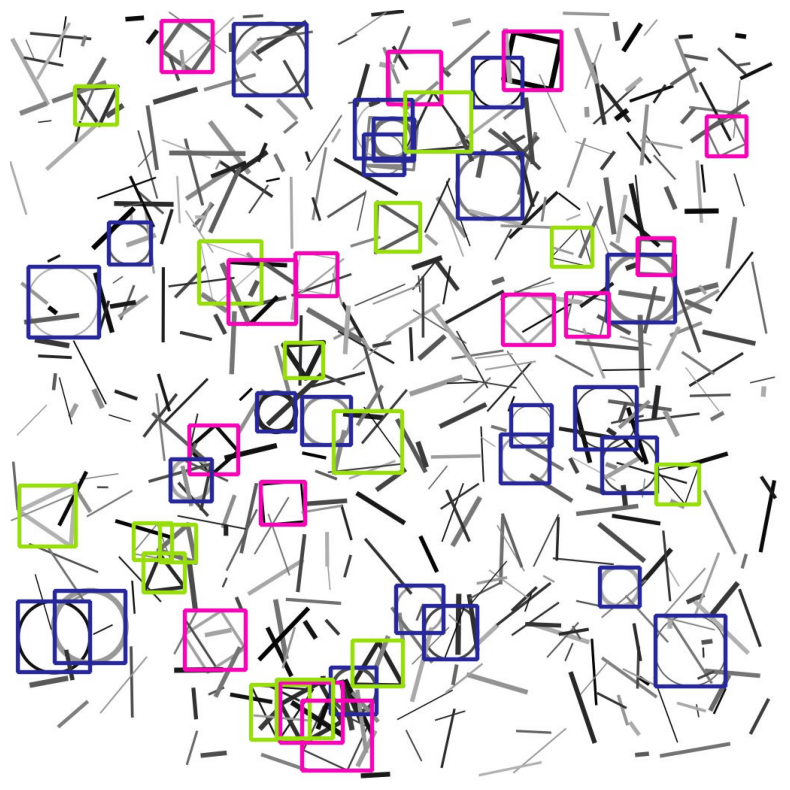

,class,score,x0,y0,x1,y1
0,2,0.999991,858.627900,805.368700,951.683300,899.293300
1,2,0.999985,652.095300,564.755300,717.079830,629.878360
2,2,0.999983,794.398740,325.321170,884.074650,415.387180
3,2,0.999983,666.284850,525.801500,720.734700,580.568600
4,2,0.999982,24.074476,341.685030,118.155464,435.408230
5,2,0.999981,328.433380,509.303440,379.396670,560.387900
6,2,0.999978,59.175888,772.222900,153.957300,868.373500
7,2,0.999977,615.257140,63.044685,681.245500,129.574390
8,2,0.999976,297.050200,18.011196,394.673400,113.986720
9,3,0.999965,720.368100,289.722500,774.567300,341.259920


outputs/inference/data-2/test0001.jpg (csv)


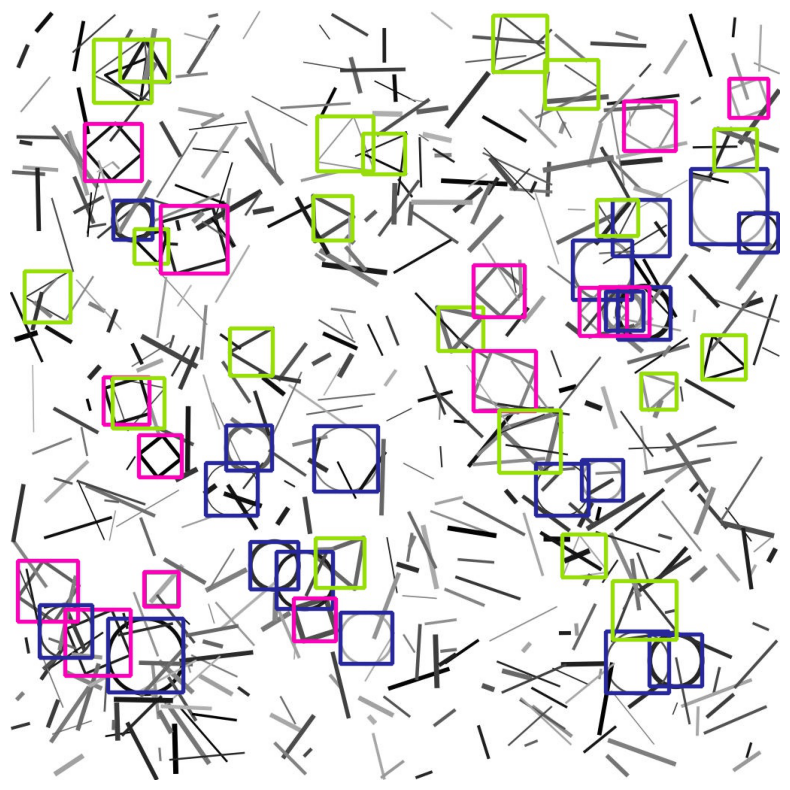

,class,score,x0,y0,x1,y1
0,2,0.999980,699.52400,603.14703,769.30615,672.92035
1,2,0.999977,905.96484,211.05510,1007.00480,311.49802
2,2,0.999972,760.86560,598.51290,815.17510,652.14075
3,2,0.999968,404.17123,553.75270,489.94772,640.29850
4,2,0.999967,439.36404,801.13360,508.48083,869.89545
...,...,...,...,...,...,...
56,4,0.081213,810.16710,367.84290,878.91850,437.19922
57,3,0.080300,792.85630,250.15417,866.53660,318.48505
58,3,0.072583,139.80570,912.51480,196.11311,968.08970
59,3,0.060474,63.54456,801.41560,142.08145,873.27920


In [8]:
#show results

path = 'outputs/inference/data-2'
for i in range(2):
  file = f'{path}/test{i:04d}'
  print(file+'.jpg (csv)')
  plt.figure(figsize=(10,10))
  plt.imshow(plt.imread(file+'.jpg'))
  plt.axis('off')
  plt.show()
  display(pd.read_csv(file+'.csv'))

## Evaluation on Test Data

In [9]:
%run eval.py --data configs/data-3.yaml --weights outputs/training/data-2/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-2.yaml --weights outputs/training/data-2/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-1.yaml --weights outputs/training/data-2/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-0.yaml --weights outputs/training/data-2/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024

[INFO/Process-43] child process calling self.run()
[INFO/Process-44] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/25]  eta: 0:00:49    time: 1.9605  data: 1.3784  max mem: 5402
[INFO/MainProcess] Test:  [24/25]  eta: 0:00:00    time: 0.6928  data: 0.1402  max mem: 5402
[INFO/Process-43] process shutting down
[INFO/Process-44] process shutting down
[INFO/Process-44] process exiting with exitcode 0
[INFO/Process-43] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:18 (0.7312 s / it)




Test data from configs/data-3.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.521               | 0.792               |
| 3               | 0.449               | 0.500               |
| 4               | 0.536               | 0.568               |
---------------------------------------------------------------
| Avg             | 0.502               | 0.620               |
---------------------------------------------------------------




[INFO/Process-45] child process calling self.run()
[INFO/Process-46] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/25]  eta: 0:00:38    time: 1.5409  data: 0.9130  max mem: 5402
[INFO/MainProcess] Test:  [24/25]  eta: 0:00:00    time: 0.6139  data: 0.0940  max mem: 5402
[INFO/Process-45] process shutting down
[INFO/Process-46] process shutting down
[INFO/Process-45] process exiting with exitcode 0
[INFO/Process-46] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:16 (0.6735 s / it)




Test data from configs/data-2.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.970               | 0.978               |
| 3               | 0.852               | 0.884               |
| 4               | 0.913               | 0.933               |
---------------------------------------------------------------
| Avg             | 0.912               | 0.932               |
---------------------------------------------------------------




[INFO/Process-47] child process calling self.run()
[INFO/Process-48] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/25]  eta: 0:00:52    time: 2.1023  data: 1.5440  max mem: 5402
[INFO/MainProcess] Test:  [24/25]  eta: 0:00:00    time: 0.6214  data: 0.0908  max mem: 5402
[INFO/Process-47] process shutting down
[INFO/Process-47] process exiting with exitcode 0
[INFO/Process-48] process shutting down
[INFO/Process-48] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:16 (0.6716 s / it)




Test data from configs/data-1.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.642               | 0.869               |
| 3               | 0.617               | 0.649               |
| 4               | 0.689               | 0.708               |
---------------------------------------------------------------
| Avg             | 0.649               | 0.742               |
---------------------------------------------------------------




[INFO/Process-49] child process calling self.run()
[INFO/Process-50] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/25]  eta: 0:00:46    time: 1.8731  data: 1.2730  max mem: 5402
[INFO/MainProcess] Test:  [24/25]  eta: 0:00:00    time: 0.6507  data: 0.1027  max mem: 5402
[INFO/Process-50] process shutting down
[INFO/Process-49] process shutting down
[INFO/Process-49] process exiting with exitcode 0
[INFO/Process-50] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:17 (0.6866 s / it)




Test data from configs/data-0.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.982               | 0.988               |
| 3               | 0.929               | 0.948               |
| 4               | 0.961               | 0.971               |
---------------------------------------------------------------
| Avg             | 0.958               | 0.969               |
---------------------------------------------------------------




<Figure size 640x480 with 0 Axes>